In [2]:
import numpy as np
import pandas as pd
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [7]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_x.shape, train_y.shape)
print(test_x.shape , test_y.shape)


NameError: ignored

In [ ]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))
test_x = test_x .reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

In [ ]:
print(train_x.shape, train_y.shape)
print(test_x.shape , test_y.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0

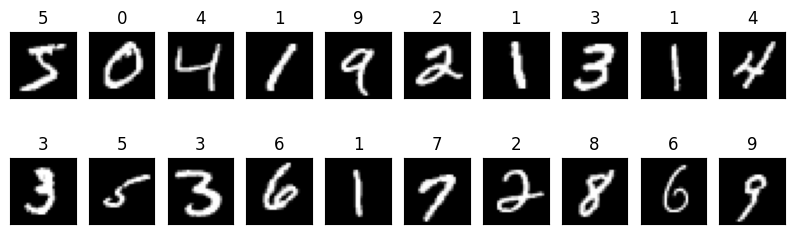

In [ ]:
fig = plt.figure(figsize = (10,3))
for i in range(20):
    ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_x[i]), cmap='gray')
    ax.set_title(train_y[i])

In [ ]:
shape = train_x.shape[1:]
shape

(28, 28, 1)

In [ ]:
model = Sequential()
#adding convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )
x=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 28s - loss: 0.2415 - accuracy: 0.9266 - val_loss: 0.0574 - val_accuracy: 0.9840 - 28s/epoch - 66ms/step
Epoch 2/10
422/422 - 27s - loss: 0.0811 - accuracy: 0.9741 - val_loss: 0.0413 - val_accuracy: 0.9880 - 27s/epoch - 63ms/step
Epoch 3/10
422/422 - 27s - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.0336 - val_accuracy: 0.9895 - 27s/epoch - 65ms/step
Epoch 4/10
422/422 - 26s - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0332 - val_accuracy: 0.9902 - 26s/epoch - 63ms/step
Epoch 5/10
422/422 - 27s - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0266 - val_accuracy: 0.9925 - 27s/epoch - 63ms/step
Epoch 6/10
422/422 - 26s - loss: 0.0366 - accuracy: 0.9878 - val_loss: 0.0297 - val_accuracy: 0.9913 - 26s/epoch - 63ms/step
Epoch 7/10
422/422 - 27s - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0263 - val_accuracy: 0.9930 - 27s/epoch - 65ms/step
Epoch 8/10
422/422 - 27s - loss: 0.0284 - accuracy: 0.9902 - val_loss: 0.0268 - val_accuracy: 0.9930 - 27s/epoch - 63ms/step


In [ ]:
loss, accuracy= model.evaluate(test_x, test_y, verbose = 0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.36000108718872
